# Projet Éolienne ( Analyse et Modélisation )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy.optimize as spsopt
import pandas as pd
import xlrd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pygrib
import matplotlib.colors as colors

**Problématique : Dimensonnement d'un parc éolien pour une petite ville**


Pour notre projet nous avons eu l'idée de modéliser une Éolienne avec toute les caractéristiques à prendre en compte (Coefficient de puissance, Vitesse du vent, Situation géographique, Nombre de pâle) afin de dimensionner un parc éolien pour un petite village.
Ici, nous avons pour but d'alimenter en électricité ***1000 foyers (entre 3000 et 10000 personnes)***.
Pour ce faire nous allons dans toute la suite du problème confronter de parcs éolien existant afin de déterminer lequel sera le plus efficace pour résoudre notre problème.

Notre argumentation sera donc séparé en **4 parties** *(l'intrduction et la conclusion sont considérés comme 1 partie)* accompagnés chacune par une problématique qui sont :

- **Introduction**
- **1. Étude Théorique et Technique** ( Modélisation de l'éolienne, Détermination du **Cp**, Recherche de l'évolution des différentes caractéristiques, Récupération des consommation électrique actuelle)
- **2. Importation des données de vent et consomation** ( Recherche des données pour la zone géographique qui nous intéresse, manipulation des bibliothèque Pygrib, et intégration et adaptation des fichiers à la suite de nos problèmes)
- **3. Simulation d'un modèle et limite de cas** ( Mise en relation de nos 2 premières parties, Analyse des différences entre les deux situations géographique )
- **Conclusion**


## Introduction

Aujorud'hui avec toutes les problématiques liées aux développement durable et à la transition énergétique, de nouvelles technologies ont vu le jour dans l'espoir de permettre au monde de pouvoir remédier au réchauffement climatique. Les différents objectifs de la COP ( conférence des parties ), notamment la vision 0 carbonne à l'horizon 2050 ne peut être envisageable sans l'utilisation massive des énergies renouvelables. L'éolienne fait partie de ces énergies renouvelables les plus utilisés. En utilisant le vent comme source primaire, celle si permet de produire une énergie mécanique par rotation des pales qui sera à sont tour convertit en énergie élctrique par le biai d'un alternateur.

<img src="energie-eolienne.jpeg" style="width:300px;height:300px"/>

## 1. Étude théorique et Technique

### 1.1 Les différents composant d'une éolienne

<img src="fonctionnement.png" style="width:500px;height:500px"/>

**Le Mât** : structure cylindrique en béton armé ou en acier qui soutient toute la structure de la nacelle et du rotor. Sa hauteur peut atteindre 100 mètres et son diamètre 10 mètres. Il contient l’échelle pour avoir accès à la nacelle et tout le câblage électrique.

 

**Les Pales**: Ils captent l’énergie cinétique (contenue dan le vent) et la transfèrent au rotor. Ils peuvent mesurer jusqu’à mètres.

 

**Le Rotor**: Il transmet le mouvement de rotation à l’arbre de transmission qui est solidaire à celui-ci. Son diamètre peut atteindre 90 mètres.

**L'Arbre de transmission**: Il reçoit le mouvement de rotation du rotor afin d’entraîner la génératrice électrique.

**La Transmission**: Elle adapte la vitesse de rotation en fonction de la génératrice.

**Le Frein**: Il permet d’arrêter l’éolienne en cas d’urgence, ou pour effectuer la maintenance.

**La Génératrice**: Elle peut être un générateur à courant continu ou un alternateur; dans tous les cas elle transforme l’énergie mécanique que lui transmet le rotor, en énergie électrique.

**Le Système de contrôle**: Il surveille le fonctionnement de l’éolienne, signale et commande l’arrêt de l’éolienne.

 

**L'Anémomètre**: Il mesure la vitesse du vent qu’il va transmettre au système de contrôle pour démarrer ou arrêter l’éolienne. Une éolienne est enclenchée à partir de 3 à 4 m/s (15 km/h) et est arrêtée approximativement à 25m/s (90 km/h).

**La Nacelle**: C’est le coffret qui se trouve en haut du mât. IL contient et protège les différentes parties de l’éolienne (la génératrice, le système de contrôle, etc.).

**Le Gouvernail**: C’est le système d’orientation pour les petites éoliennes; Il sert à maintenir le rotor de l’éolienne dans l’axe horizontal face au vent afin de tirer le maximum d’énergie.

L'éolienne suit plusieurs Loi qui faudra respecter pour son bon fonctionnement :

**Puissance mécanique du vent traversant l’éolienne :**
	L’énergie cinétique du vent est donnée par la relation suivante :
    $$ E_c=\frac{1}{2}mv^2$$
 
* m : masse du volume d’air ( en Kg )
* v : vitesse instantané du vent ( en m/s)
* Ec : Energie cinétique ( en joules ) 

Pour déterminer la masse de l’air traversant l’éolienne est donnée par :
$$ M=\rho V $$
* \rho : Masse volumique ( en kg/m3)
* V : Volume d’air occupé ( en m3)

Or volume de l’aire traversant l’éolienne peut aussi s’écrire : $$ V=S*\delta(x)= S*v*t$$ d’où on déduit que : 
$$E_c=\frac{1}{2} \rho S v^3 *t = P * t$$
Par analogie :
$$ P=\frac{1}{2} \rho S v^3$$
* P : Puissance théoriquement récupérable (Watt)
* S : Section engendré par les pales de l’éolienne

Comme la section S est circulaire $$S=\pi*R^2$$ 
$$ P=\frac{1}{2}\rho \pi R^2v^3$$





**On va tracer l’évolution de la puissance Théorique récupérable du vent en fonction du rayon des pales et de la vitesse du vent.**

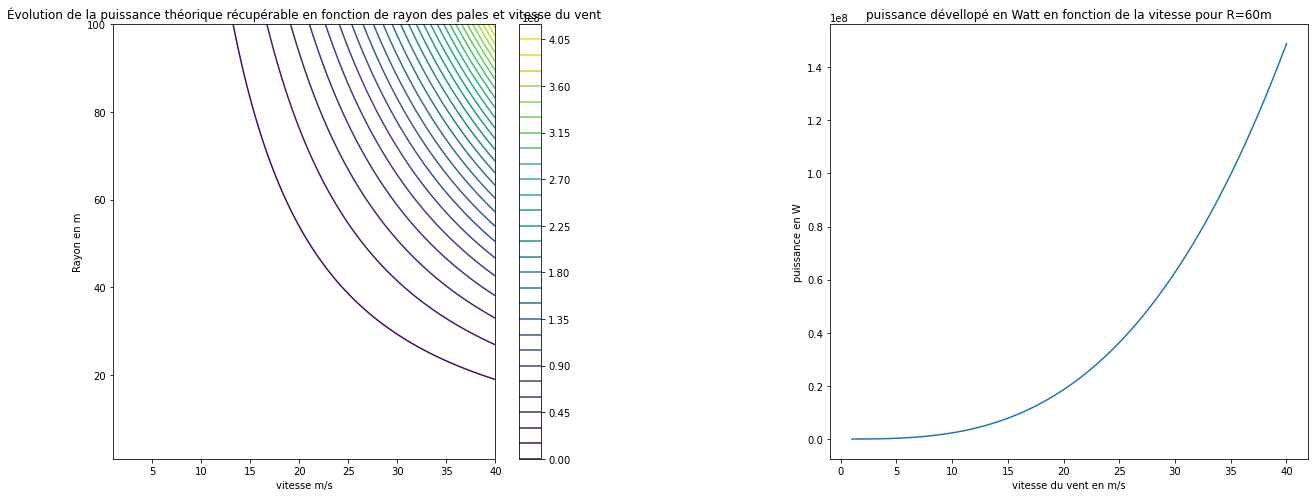

In [3]:

def puissance(v,R,rho):
    x, y=np.meshgrid(v,R)
    P=1/2*rho*y**2*x**3
    return P

def puissance_R_fixe(v,R):
    P=1/2*rho*R**2*v**3
    return P

    # Paramètres 

N=100
rho=1.292
v=np.linspace(1,40,N)
R=np.linspace(1,100,N)

    # Tracés des fonctions
    
figure=plt.figure(1,figsize=(8,8))

P=puissance(v,R,rho)

plt.subplot(1,2,1)
plt.contour(v,R,P,30)
plt.colorbar()
plt.ylabel('Rayon en m')
plt.xlabel('vitesse m/s')
plt.title('Évolution de la puissance théorique récupérable en fonction de rayon des pales et vitesse du vent')
plt.subplots_adjust(right=2.2,wspace=0.5,hspace=0)

P=puissance_R_fixe(v,60)

plt.subplot(1,2,2)
plt.plot(v,P)
plt.xlabel('vitesse du vent en m/s')
plt.ylabel ('puissance en W')
plt.title('puissance dévellopé en Watt en fonction de la vitesse pour R=60m')
plt.show()

**Commentaire** : On remarque que la vitesse du vent à une influence plus probante que l'évolution du rayon de notre éolienne. Il est donc préférable de trouver une zone interréssante pour sont abondance d'énergie éloienne, que de dimenssioner une élionne à n'importe quelle endroit en augmentant le rayon de l'éolienne

En temps réel on sait que nos pâle atteindrons une limite maximale qui est ***la limite de Betz***. La limite de Betz est une loi physique qui indique que la puissance théorique maximale développée par un capteur éolien est égale à 16/27 (environ 60 %) de la puissance incidente du vent qui traverse l'éolienne.
***Essayons donc de la retrouver et de la définir à l'aide d'un graphique***

#### 1.2 calcul du coeficient de puissance Cp 

D'un point de vu mécanique, il est clair que pour être réaliste nous ne pouvons pas nous placer dans un cadre où tous les tranferts et mouvement seraient ârfait. Nous devons donc apporter une hypothèse. C'est à dire prendre en compte que toute l'énergie cinétique du vent n'est pas convertie en énergie mécanique de rotation. Effectivememnt ce phénomène de derpdition est bien présent et tant vers une limite appelé limite de Beitz 


**Hypothéses**
* L'étude est réalisée dans un référentiel $R$ lié au sol et supposé galiléen
* L'air est considéré comme un fluide parfait, homogène et incompressible de masse volumique $\rho$
* On suppose que le mouvement de l'air est stationnaire et à symétrie de révolution autour de l'axe de rotation de l'hélice

Considérons deux points sur la meme ligne du courant, un en amont des pales(1) et l'autre en aval (2)

**Energie cinétique**
$$
\dot{m}=S.v_1.\rho =S.v_2.\rho=S.v_{avg}.\rho
$$
$$
\dot E_{c1}=\dfrac{1}{2}.S.\rho.v_1^3
$$
$$
\dot E_{c2}=\dfrac{1}{2}.S.\rho.v_2^3
$$
La variation d’énergie cinétique est égale à:
$$\Delta \dot E_{c}=\dfrac{1}{2}.\rho.S.v_{avg}.(v_2^2-v_1^2)$$


La variation de quantité de mouvement entre l'amont et l'aval est:
$$\frac{d\vec{p}}{dt}=\dot{m}.(\vec{v_1}-\vec{v_2})=\rho.S.v_{avg}.(\vec{v_1}-\vec{v_2})$$


On déduit alors que la puissance perdue par le vent et donc absorbée par le rotor est égale à : 
$$P=\frac{d\vec{p}}{dt}\vec{v_{avg}}=\rho.S.v_{avg}^2.(v_1-v_2)$$

Or cette puissance est égale à l’opposé de la variation d’énergie cinétique 
$$P=-\Delta \dot E_{c}$$
$$\rho.S.v_{avg}^2.(v_1-v_2)=-\dfrac{1}{2}.\rho.S.v_{avg}.(v_2^2-v_1^2)$$

Par une simple analogie on constate bien que $v_{avg}=\dfrac{v_1+v_2}{2}$

P devient:  $P=\rho.S.\frac{(v_1+v_2)^2}{4}.(v_1-v_2)=\rho.S.v_1^3\dfrac{1+\frac{v_2}{v_1}}{4}.(1-\frac{v_2^2}{v_1^2})$

En divisant cette puissance par la puissance de vent disponible $P_1$ on aura ce qu'on appel le coefficient de puissance $C_p$ qui a pour valeur:
$$C_p=\frac{P}{P_1}=C_p=\frac{1}{2}(1+\frac{v_2}{v_1}).(1-\frac{v_2^2}{v_1^2})$$

Afin de pouvoir determiner la valeur maximale de $C_p$ on trace le graphe de $C_p$ en fonction de $\frac{v_2}{v_1}$ sachant que le rapport $\frac{v_2}{v_1}$ est entre 0 et 1 


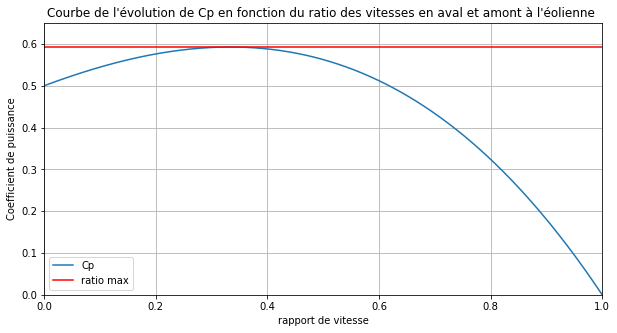

In [4]:
#Traçons le graphe du Cp ( Coefficient de puissance ) en fonction de V2/V1 (Puissance en sortie/Puissance en entrée)

z=np.linspace(0,1,500)
z_max=np.ones(len(z))
cp=1/2*(1+z)*(1-z**2)
z_max=z_max*max(cp)

plt.figure(2,figsize=(10,5))
plt.plot(z,cp,label='Cp')
plt.plot(z,z_max, color="red", label='ratio max')
plt.title("Courbe de l'évolution de Cp en fonction du ratio des vitesses en aval et amont à l'éolienne ")
plt.ylabel('Coefficient de puissance')
plt.xlabel('rapport de vitesse')
plt.xlim(0,1)
plt.ylim(0,0.65)

index_max = max(range(len(cp)), key=cp.__getitem__)

plt.plot(index_max,max(cp), marker="o", color="red")
plt.legend()
plt.grid()
plt.show()

L'existence de la limite de Betz traduit la compétition entre deux phénomènes opposés :

- Une éolienne récupère d'autant plus d'énergie qu'elle freine le vent (ce qui est traduit par le terme  $ V1^2-V2^2 $ de la formule de puissance) ...
- ... mais elle en récupère d'autant moins que le débit est plus faible, or le ralentissement réduit le débit (ce qui est traduit par le terme $ V1+V2 $ de la formule de puissance)

## 2. Importation et traitement des fichiers de consommation éléctrique et production de vent

### 2.1 Données des puissances consommées française (RTE)

In [5]:
workbook = xlrd.open_workbook('conso_annuelle.xls')   #Import du tableau excel des puissance consommé en France toutes les 30 min par RTE
SheetNameList = workbook.sheet_names()

worksheet = workbook.sheet_by_name(SheetNameList[0])  #conversion en fichier utilisable et récupération des dimensions utilent
num_rows = worksheet.nrows 
num_cells = worksheet.ncols 
r=num_rows
c=num_cells
print( 'num_ligne :',num_rows, ', num_cells', num_cells )

#conversion en matrice utilisable pour les calculs
curr_row = 0
tab_annu_conso=np.empty([r,c])
i=0
while curr_row < num_rows:
    curr_cell = 0
    j=0
    while curr_cell < num_cells:
        # Cell Types: 0=Empty, 1=Text, 2=Number, 3=Date, 4=Boolean, 5=Error, 6=Blank
        cell_type = worksheet.cell_type(curr_row, curr_cell)
        cell_value = worksheet.cell_value(curr_row, curr_cell) 
        tab_annu_conso[i,j]=cell_value
        curr_cell += 1
        j=j+1
    curr_row += 1
    i=i+1
    
h_journée=np.arange(0.5,24.5,0.5)


num_ligne : 365 , num_cells 48


Après avoir récupérer les fichiers, nous avons tracer les courbes moyennés de consommation électrique pour les différentes saisons :

<ipython-input-6-ddacffc77fcb>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


<function matplotlib.pyplot.show(close=None, block=None)>

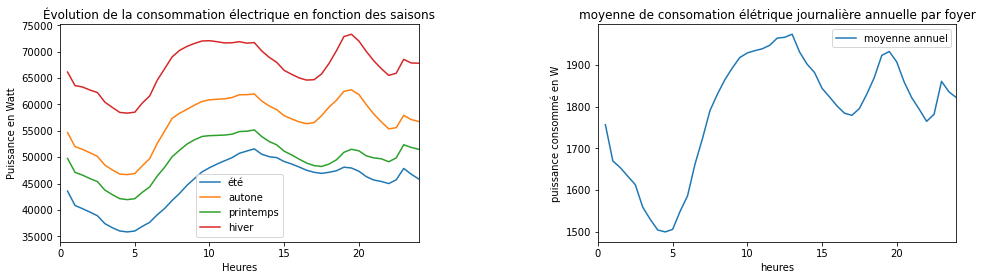

In [6]:
moyenne_été_journalière=np.zeros(len(tab_annu_conso[0,:]))

for i in range(172,264) :   #prendre la valeur n-1 dans la boucle pour bien avoir les bon jours
    moyenne_été_journalière=moyenne_été_journalière+tab_annu_conso[i,:]
    
moyenne_été_journalière=moyenne_été_journalière/(264-173)
plt.figure(1)
plt.subplot(1,2,1)
plt.title('moyenne de consomation élétrique journalière France par saison')
plt.plot(h_journée,moyenne_été_journalière, label='été')
plt.xlabel('heures')
plt.ylabel('puissance consommé en MW')
plt.legend()
plt.xlim(0,24)
   # Consommation en automne
    
moyenne_auto_journalière=np.zeros(len(tab_annu_conso[0,:]))
for i in range(264,355) :    #prendre la valeur n-1 dans la boucle pour bien avoir les bon jours
    moyenne_auto_journalière=moyenne_auto_journalière+tab_annu_conso[i,:]
moyenne_auto_journalière=moyenne_auto_journalière/(355-265)

plt.subplot(1,2,1)
plt.plot(h_journée,moyenne_auto_journalière, label='autone')
plt.legend()

    #Consommation au printemps
    
moyenne_pri_journalière=np.zeros(len(tab_annu_conso[0,:]))
for i in range(79,173) :    #prendre la valeur n-1 dans la boucle pour bien avoir les bon jours
    moyenne_pri_journalière=moyenne_pri_journalière+tab_annu_conso[i,:]
moyenne_pri_journalière=moyenne_pri_journalière/(173-80)

plt.figure(1,2,1)
plt.plot(h_journée,moyenne_pri_journalière, label='printemps')
plt.legend()

    # Consommation en Hiver
    
moyenne_hi_journalière=np.zeros(len(tab_annu_conso[0,:]))
for i in range(354,365) :    #prendre la valeur n-1 dans la boucle pour bien avoir les bon jours
    moyenne_hi_journalière=moyenne_hi_journalière+tab_annu_conso[i,:]

for i in range(-1,80) :    #prendre la valeur n-1 dans la boucle pour bien avoir les bon jours
    moyenne_hi_journalière=moyenne_hi_journalière+tab_annu_conso[i,:]

moyenne_hi_journalière=moyenne_hi_journalière/(365-355+80)

plt.figure(1,2,1)
plt.plot(h_journée,moyenne_hi_journalière, label='hiver')
plt.title('Évolution de la consommation électrique en fonction des saisons')
plt.xlabel('Heures')
plt.ylabel('Puissance en Watt')
plt.legend()

    # Moyenne de consommationn annuelle

moyenne_h_journalière=np.zeros(len(tab_annu_conso[0,:]))
for i in range(0,365) :    #prendre la valeur n-1 dans la boucle pour bien avoir les bon jours
    moyenne_h_journalière=moyenne_h_journalière+tab_annu_conso[i,:]


nb_foyer=30*10**6
moyenne_h_journalière=(moyenne_h_journalière/(365))*(10**6)/nb_foyer

plt.subplots_adjust(right=2.2,wspace=0.5,hspace=0)

plt.subplot(1,2,2)
plt.title('moyenne de consomation élétrique journalière annuelle par foyer')
plt.xlabel('heures')
plt.ylabel('puissance consommé en W')
plt.plot(h_journée,moyenne_h_journalière, label='moyenne annuel')
plt.xlim(0,24)
plt.legend()
plt.show

**Commentaires:**

Comme nous pouvons le voir sur le premier graph, plus une saison est froide, plus la consommation général est importante. En hiver on consomme plus que en été. Ceci est du au chauffage et aux journées plus courtes qui augmentent notre consommation éléctrique. Le profile de consommation moyenné par saison sur une journée est à peu de chose près similaire entre les saison. on voit clairement que la nuit notre conso diminue et reste basse, elle augmente au matin (période ou nous nous reveillons et commençons à utiliser nos appareils). pour atteindre palier stable jusqu'à midi. Entre midi et 17h la consommation diminue pour ré-augmenter et atteindre un pic entre la fin d'après-midi et le début de soirée avant de redescendre et se stabilisé au minimum pour la nuit.

### 2.2 Données des vents


Le deuxième gros paramètre à prendre en compte pour notre dimensionnement était la récupération des données de vents.
**À titre indicatif** toutes nos données de vents ont été récupérer sur le site: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=overview

Cette partie sera divisé en 3 sous partie :
- **1. Une mise en contexte avec l'affichage d'une carte représentant la situation géographique de nos deux parcs éolien**
- **2. La récupération des valeurs moyennes mensuelles annuelles**
- **3. La récupération des moyennes horaires mensuelles annuelles**

In [7]:
 # Récupération et définition du fichier (Ici nous avons le fichier mensuel)
    
file = 'Mensu_Anu.grib'
grbs = pygrib.open(file)

In [8]:
 # Vérification des différentes valeurs ( Ici nous devrions avoir 12 Valeurs (12 mois))
    
grbs.seek(0)
for grb in grbs:
    print(grb)

1:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202001010000
2:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202002010000
3:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202003010000
4:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202004010000
5:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202005010000
6:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202006010000
7:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202007010000
8:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202008010000
9:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 202009010000
10:10 metre wind speed:m s**-1 (avgua

#### 2.2.1 Représentation des deux situation géographiques

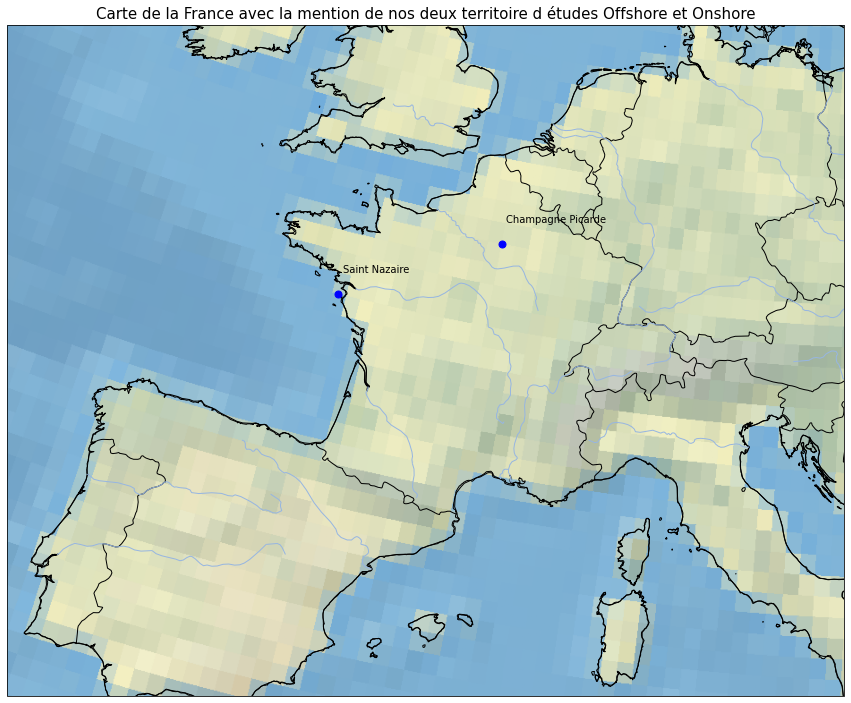

In [9]:
# Bordure de L'Europe

x0=-10.43
x1=15.22
y0=39.09
y1=52.07

# Les différents points qui nous intéressent sont les Parcs Éolien de Champagne Picarde (ONSHORE) et de Saint Nazaire (OFFSHORE) avec les coordonnés suivantes :

    # Valeur GPS :

Lon_Picarde = 3 # Longitude Picarde
Lat_Picarde = 49 # Latitude Picarde
Lon_Nazaire = -2.3 # Longitude St_Nazaire
Lat_Nazaire = 47 # Latitude St_Nazaire

    # Génération de graphique

map_crs= ccrs.LambertConformal(central_longitude=20.0, central_latitude=45.0)
data_crs=ccrs.PlateCarree()
fig=plt.figure(1,figsize=(15,15))
ax=plt.subplot(1,1,1,projection=map_crs)

    # Marquage des points qui nous intéressent

ax.plot(Lon_Picarde, Lat_Picarde, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(Lon_Picarde, Lat_Picarde+0.5, 'Champagne Picarde', transform=ccrs.Geodetic())

ax.plot(Lon_Nazaire, Lat_Nazaire, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(Lon_Nazaire, Lat_Nazaire+0.5, 'Saint Nazaire', transform=ccrs.Geodetic())

    # Amélioration de l'image en y rajoutant les traits de côtes et les fleuves
    
ax.set_extent([x0,x1,y0,y1],data_crs)
ax.stock_img()
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
plt.title('Carte de la France avec la mention de nos deux territoire d études Offshore et Onshore',fontsize=15)
plt.show()

#### 2.2.2 Récupération des valeurs mensuelles annuelles

Après la mise en contexte, la seconde étape était de récupérer maintenant nos fichiers de vents. Dans un premier temps, le code suivant nous permet de récupérer les moyennes mensuelles et de les représenter.

***PS : Ici nous avons représenter seulement sur la carte les différentes températures pour Janvier et Juin mais nous aurions les représenter pour toutes l'année.***

In [12]:
for g in grbs:
    lats,lons = g.latlons() 
    lats, lons = np.array(lats), np.array(lons)

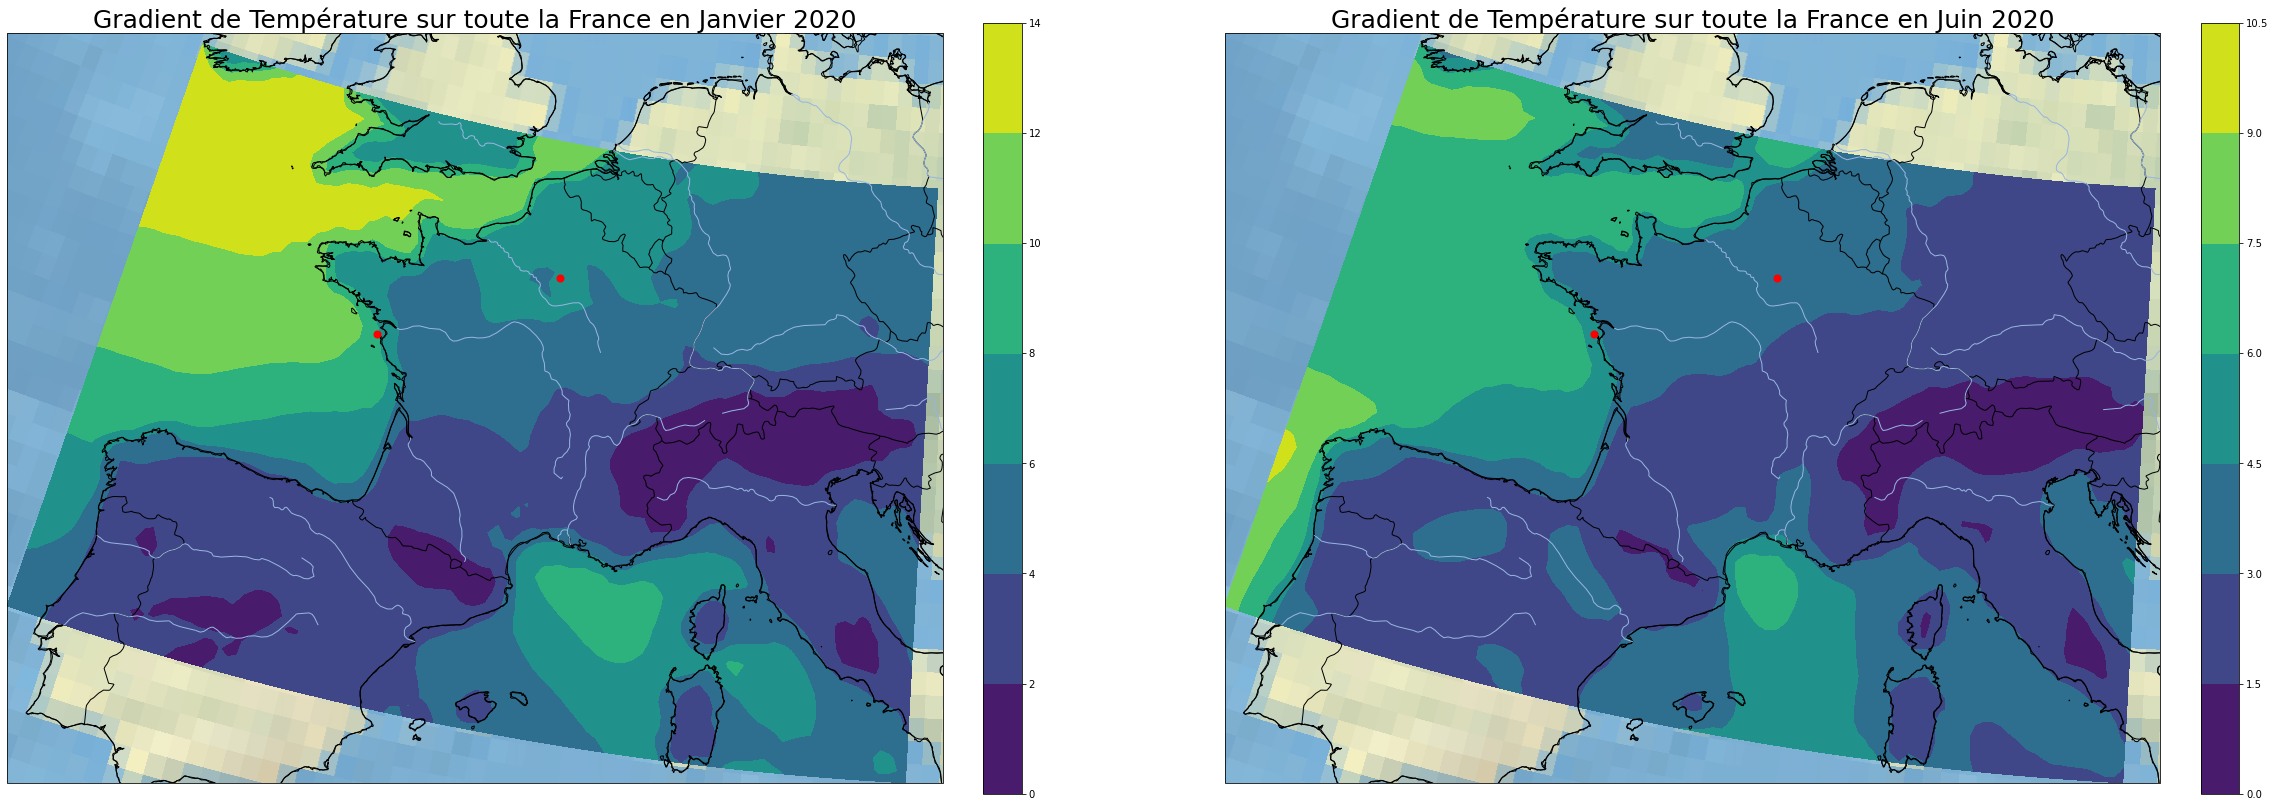

In [13]:
grbs.seek(0)
grb_wind1 = grbs.select(name='10 metre wind speed')[1] # Correspond a la vitesse moyenne au mois de Janvier
data_wind1 = grb_wind1.values 

grbs.seek(0)
grb_wind2 = grbs.select(name='10 metre wind speed')[6] # Correspond a la vitesse moyenne au mois de Juin
data_wind2 = grb_wind2.values 

    # Bordure de L'Europe

x0=-10.43
x1=15.22
y0=39.09
y1=52.07

    # Création de l'environnement
    
map_crs= ccrs.LambertConformal(central_longitude=20.0, central_latitude=45.0)
data_crs=ccrs.PlateCarree()

    #Projection  sur la carte
    
figure=plt.figure(figsize=(40,40))

ax=figure.add_subplot(2,2,1,projection=map_crs)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)


    #Réduction du plan à notre intervalle détude
    
ax.set_extent([x0,x1,y0,y1],data_crs)
ax.stock_img()

    

    # Identification du point d'étude
    
ax.plot(Lon_Picarde, Lat_Picarde, 'ro', markersize=7, transform=ccrs.Geodetic())
ax.plot(Lon_Nazaire, Lat_Nazaire, 'ro', markersize=7, transform=ccrs.Geodetic())


    # Projection de nos valeurs sur la carte (Vitesse du vent)

a=ax.contourf(lons,lats,data_wind1,transform=data_crs)
plt.title('Gradient de Température sur toute la France en Janvier 2020',fontsize = 25)

    #Compléments
    
plt.colorbar(a,fraction=0.038, pad=0.04, orientation='vertical')


ay=figure.add_subplot(2,2,2,projection=map_crs)
ay.add_feature(cfeature.COASTLINE.with_scale('10m'))
ay.add_feature(cfeature.BORDERS)
ay.add_feature(cfeature.COASTLINE)
ay.add_feature(cfeature.RIVERS)

ay.set_extent([x0,x1,y0,y1],data_crs)
ay.stock_img()

ay.plot(Lon_Picarde, Lat_Picarde, 'ro', markersize=7, transform=ccrs.Geodetic())
ay.plot(Lon_Nazaire, Lat_Nazaire, 'ro', markersize=7, transform=ccrs.Geodetic())


b=ay.contourf(lons,lats,data_wind2,transform=data_crs)
plt.colorbar(b,fraction=0.038, pad=0.04, orientation='vertical')
plt.title('Gradient de Température sur toute la France en Juin 2020',fontsize = 25)

plt.show()

On remarque à la fin de notre représentation la vitesse du vents est plus important en Janvier qu'en Juin (***Saison différente***). 

Avec ces données, nous avons pu créer deux vecteur qui retourne les valeurs de vent au ième mois pour nos points d'étude.

In [86]:
k=np.arange(1,13)
Vent_Picarde=np.zeros(12)
Vent_Nazaire=np.zeros(12)
for i in range (len(k)):
    j=i+1
    g=grbs[j]
    my_values =g['values']
    Vent_Picarde[i]=my_values[11][54]
    Vent_Nazaire[i]=my_values[19][30]

#### 2.2.3 Récupération des moyennes horaires mensuelles annuelles

Il reste à procéder de la même manière que la cellule précédente pour récupérer les données horaires mensuelles annuelles. Il faut préalablement enregistrer et ouvrir notre fichier :

In [88]:
file = 'Journ_Anu.grib'
grbs2 = pygrib.open(file)

In [89]:
k=np.arange(1,24)

    # Création des vecteurs pour Picarde

Vent_Janvier_Picarde=np.zeros(24)
Vent_Février_Picarde=np.zeros(24)
Vent_Mars_Picarde=np.zeros(24)
Vent_Avril_Picarde=np.zeros(24)
Vent_Mai_Picarde=np.zeros(24)
Vent_Juin_Picarde=np.zeros(24)
Vent_Juillet_Picarde=np.zeros(24)
Vent_Août_Picarde=np.zeros(24)
Vent_Septembre_Picarde=np.zeros(24)
Vent_Octobre_Picarde=np.zeros(24)
Vent_Novembre_Picarde=np.zeros(24)
Vent_Décembre_Picarde=np.zeros(24)

    # Création des vecteurs pour St-Nazaire 

Vent_Janvier_Nazaire=np.zeros_like(Vent_Avril_Picarde)
Vent_Février_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Mars_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Avril_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Mai_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Juin_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Juillet_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Août_Nazaire=np.zeros_like(Vent_Janvier_Nazaire)
Vent_Septembre_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Octobre_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Novembre_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
Vent_Décembre_Nazaire=np.zeros_like(Vent_Janvier_Picarde)
grbs2.seek(0)
j=0
for i in range(len(k)):
    j=j+1
    g=grbs2[j]
    my_values =g['values']
    Vent_Janvier_Picarde[i]=my_values[11][54]
    Vent_Janvier_Nazaire[i]=my_values[19][30]
    g1=grbs2[(j+24)]
    my_values = g1['values']
    Vent_Février_Picarde[i]=my_values[11][54]
    Vent_Février_Nazaire[i]=my_values[19][30]
    g2=grbs2[(j+24*2)]
    my_values = g2['values']
    Vent_Mars_Picarde[i]=my_values[11][54]
    Vent_Mars_Nazaire[i]=my_values[19][30]
    g3=grbs2[(j+24*3)]
    my_values = g3['values']
    Vent_Avril_Picarde[i]=my_values[11][54]
    Vent_Avril_Nazaire[i]=my_values[19][30]
    g4=grbs2[(j+24*4)]
    my_values = g4['values']
    Vent_Mai_Picarde[i]=my_values[11][54]
    Vent_Mai_Nazaire[i]=my_values[19][30]
    g5=grbs2[(j+24*5)]
    my_values = g5['values']
    Vent_Juin_Picarde[i]=my_values[11][54]
    Vent_Juin_Nazaire[i]=my_values[19][30]
    g6=grbs2[(j+24*6)]
    my_values = g6['values']
    Vent_Juillet_Picarde[i]=my_values[11][54]
    Vent_Juillet_Nazaire[i]=my_values[19][30]
    g7=grbs2[(j+24*7)]
    my_values = g7['values']
    Vent_Août_Picarde[i]=my_values[11][54]
    Vent_Août_Nazaire[i]=my_values[19][30]
    g8=grbs2[(j+24*8)]
    my_values = g8['values']
    Vent_Septembre_Picarde[i]=my_values[11][54]
    Vent_Septembre_Nazaire[i]=my_values[19][30]
    g9=grbs2[(j+24*9)]
    my_values = g9['values']
    Vent_Octobre_Picarde[i]=my_values[11][54]
    Vent_Octobre_Nazaire[i]=my_values[19][30]
    g10=grbs2[(j+24*10)]
    my_values = g10['values']
    Vent_Novembre_Picarde[i]=my_values[11][54]
    Vent_Novembre_Nazaire[i]=my_values[19][30]
    g11=grbs2[(24*11+i)]
    my_values = g11['values']
    Vent_Décembre_Picarde[i]=my_values[11][54]
    Vent_Décembre_Nazaire[i]=my_values[19][30]


## 3. Création d'un modèle standart d'éolienne et comparaison à un foyer simple et Dimensionnement d'une installation pour une ville de 1000 foyer 


Dans cette 3e et dernière partie, nous allons mettre en commun nos deux première partie ( Modèle d'éolienne, Données de consommation et Données météorologiques

### 3.1 Modèle standard d'une éolienne

<ipython-input-7-12bacc6026e6>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


NameError: name 'Vent_Juillet_Picarde' is not defined

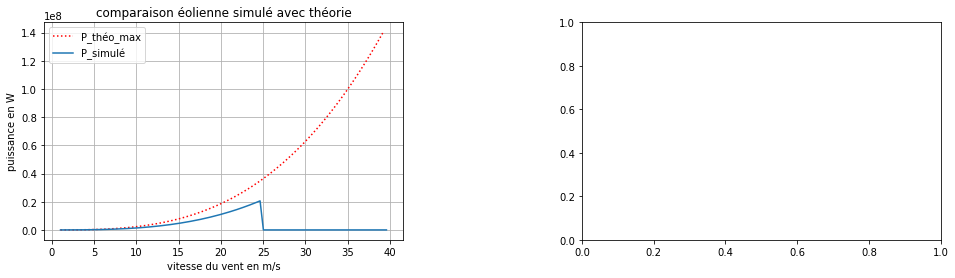

In [7]:
#création d'une fonction pour rendre le vecteur vent de même dimension que celui des puissance importé

def doubl_vent (V) : 
    v_new=np.ones(2*len(V))
    n=0
    for i in range(0,2*len(V),2):
        v_new[i]=V[n]
        v_new[i+1]=V[n]
        n=n+1
    v_new[2*len(V)-1]= (v_new[2*len(V)-3]+v_new[0])/2     #lissage des deux dernière valeur par défaut
    v_new[2*len(V)-2]= (v_new[2*len(V)-3]+v_new[0])/2
    return(v_new)


#fonction simulant le fonctionnement d'une éoliènne avec ces limite et hypothèses
def puissance_éolienne(v,R):     #création de la fonction de notre éolienne avec les paramètres de notre modèle, les limites de fonctionnements, et les dimentions choisies
    lim_vent_faible=10/3.6       #équivaut à 10km/h
    lim_vent_max= 90/3.6         #équivalent de 90km/h
    P=1/2*rho*R**2*doubl_vent(v)**3*max(cp)
    for i in range(len(doubl_vent(v))) : 
        if doubl_vent(v)[i]>lim_vent_max :            #vitesse de coupure
            P[i]=0
            P[i+1]=0
        elif doubl_vent(v)[i]<lim_vent_faible:
            P[i]=0
    return (P)


R=60     #rayon d'une de l'éolienne standar d'edf

#test de fonctionnement de l'olienne entre la puissance théorique et celle siùmulé avec les hypothèses :
plt.figure()
P=puissance_R_fixe(v,R)
plt.subplot(1,2,1)
plt.plot(v[0:len(v)-2],P[0:len(P)-2], 'r:',linewidth=1.5, label='P_théo_max')
plt.subplots_adjust(right=2.2,wspace=0.5,hspace=0)
P=puissance_éolienne(v,R)
plt.subplot(1,2,1)
plt.plot(doubl_vent(v)[0:len(doubl_vent(v))-2],P[0:len(P)-2], label='P_simulé')
plt.xlabel('vitesse du vent en m/s')
plt.ylabel('puissance en W')
plt.title('comparaison éolienne simulé avec théorie')
plt.grid()
plt.legend()

    # Test avec un fichier de vent journalier 
plt.subplot(1,2,2)
P=puissance_éolienne(Vent_Juillet_Picarde,R)
plt.plot(h_journée,P)
plt.show()


### 3.2 Dimenssionnement d'une installation pour une ville de 1000 foyer 

Text(0, 0.5, 'nb éolienne en activité')

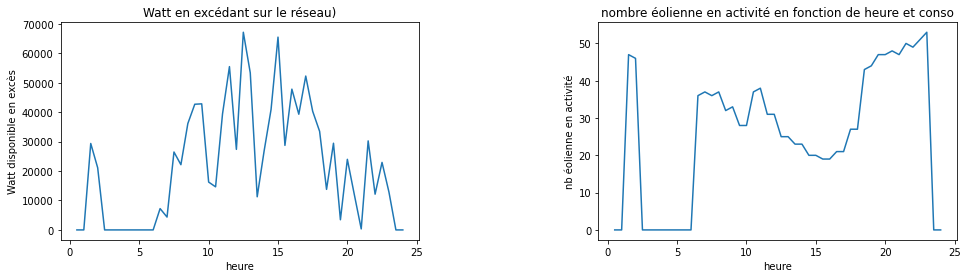

In [103]:

#conso village 1000 foyer
nb_mén_SN=1000
P_moy_SN_été_conco=(moyenne_été_journalière*(10**6)/nb_foyer)*nb_mén_SN

#fonction de comparaison entre la consomation et la puissance produite en adaptant le nombre d'éolienne
def comp_conso_prod(P,C):
    P_réseau=np.ones(len(C))
    nb_éol=np.ones(len(C))
    for i in range(len(C)):
        P_réseau[i]=P[i]-C[i]
        n=1
        while P_réseau[i]<0 :
            P_réseau[i]=n*P[i]-C[i]
            n=n+1
            if P[i] == 0:
                P_réseau[i]=0
                n=0
                break
        nb_éol[i]=n
    
    return (P_réseau, nb_éol)

#test de fonctionnement
p, m=comp_conso_prod(puissance_éolienne(Vent_Août_Picarde,60),P_moy_SN_été_conco)
plt.subplot(1,2,1)
plt.plot(h_journée,p)
plt.title('Watt en excédant sur le réseau)')
plt.xlabel('heure')
plt.ylabel('Watt disponible en excès')

plt.subplots_adjust(right=2.2,wspace=0.5,hspace=0)

plt.subplot(1,2,2)
plt.plot(h_journée,m)
plt.title('nombre éolienne en activité en fonction de heure et conso')
plt.xlabel('heure')
plt.ylabel('nb éolienne en activité')

### 3.2.1  Étude annuelle consomation vs production pour une ville de mille foyer

<ipython-input-106-c35ed3f6e18a>:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-106-c35ed3f6e18a>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-106-c35ed3f6e18a>:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and

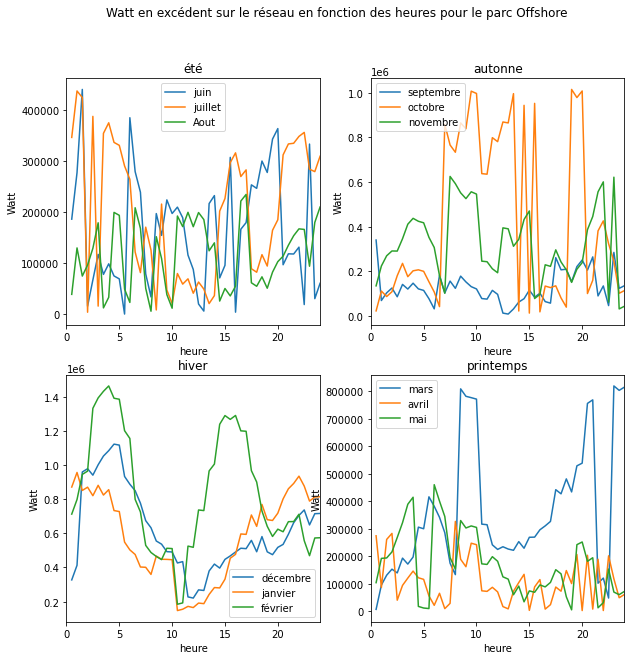

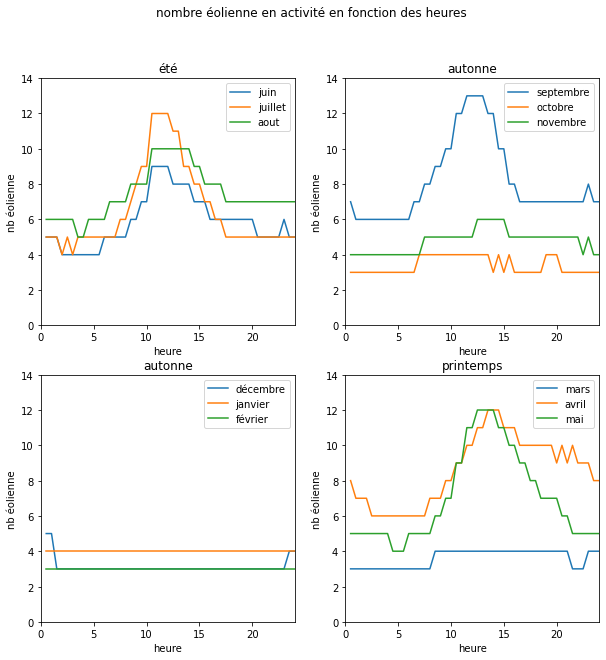

nombre max d éolienne en activité au cours de l année = 13.0
nombre min d éolienne en activité au cours de l année = 3.0


In [106]:


n=np.zeros(12)
mi=np.zeros(12)

    #été : 

p, m=comp_conso_prod(puissance_éolienne(Vent_Juin_Nazaire,60),P_moy_SN_été_conco)
n[0]=max(m)
mi[0]=min(m)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.subplot(2,2,1)
plt.suptitle('Watt en excédent sur le réseau en fonction des heures pour le parc Offshore')
plt.plot(h_journée,p, label='juin')
plt.title('été')
plt.xlabel('heure')
plt.ylabel('Watt')
plt.xlim(0,24)

plt.figure(figsize=(10,10))
plt.figure(2)
plt.subplot(2,2,1)
plt.suptitle('nombre éolienne en activité en fonction des heures')
plt.plot(h_journée,m, label='juin')
plt.title('été')
plt.xlabel('heure')
plt.ylabel('nb éolienne')
plt.xlim(0,24)
plt.ylim(0,14)

p, m=comp_conso_prod(puissance_éolienne(Vent_Juillet_Nazaire,60),P_moy_SN_été_conco)
n[1]=max(m)
mi[1]=min(m)
plt.figure(1)
plt.subplot(2,2,1)
plt.plot(h_journée,p, label='juillet')
plt.figure(2)
plt.subplot(2,2,1)
plt.plot(h_journée,m, label='juillet')

p, m=comp_conso_prod(puissance_éolienne(Vent_Août_Nazaire,60),P_moy_SN_été_conco)
n[2]=max(m)
mi[2]=min(m)
plt.figure(1)
plt.subplot(2,2,1)
plt.plot(h_journée,p, label='Aout')
plt.legend()
plt.figure(2)
plt.subplot(2,2,1)
plt.plot(h_journée,m, label='aout')
plt.legend()


    #Automne 

P_moy_SN_auto_conco=(moyenne_auto_journalière*(10**6)/nb_foyer)*nb_mén_SN
p, m=comp_conso_prod(puissance_éolienne(Vent_Septembre_Nazaire,60),P_moy_SN_auto_conco)
n[3]=max(m)
mi[3]=min(m)
plt.figure(1)
plt.subplot(2,2,2)
plt.plot(h_journée,p, label='septembre')
plt.title('autonne')
plt.xlabel('heure')
plt.ylabel('Watt')
plt.xlim(0,24)

plt.figure(2)
plt.subplot(2,2,2)
plt.plot(h_journée,m, label='septembre')
plt.title('autonne')
plt.xlabel('heure')
plt.ylabel('nb éolienne')
plt.xlim(0,24)
plt.ylim(0,14)

p, m=comp_conso_prod(puissance_éolienne(Vent_Octobre_Nazaire,60),P_moy_SN_auto_conco)
n[4]=max(m)
mi[4]=min(m)
plt.figure(1)
plt.subplot(2,2,2)
plt.plot(h_journée,p, label='octobre')
plt.figure(2)
plt.subplot(2,2,2)
plt.plot(h_journée,m, label='octobre')


p, m=comp_conso_prod(puissance_éolienne(Vent_Novembre_Nazaire,60),P_moy_SN_auto_conco)
n[5]=max(m)
mi[5]=min(m)
plt.figure(1)
plt.subplot(2,2,2)
plt.plot(h_journée,p, label='novembre')
plt.legend()
plt.figure(2)
plt.subplot(2,2,2)
plt.plot(h_journée,m, label='novembre')
plt.legend()

    #Hiver :

P_moy_SN_hi_conco=(moyenne_hi_journalière*(10**6)/nb_foyer)*nb_mén_SN
p, m=comp_conso_prod(puissance_éolienne(Vent_Décembre_Nazaire,60),P_moy_SN_hi_conco)
n[6]=max(m)
mi[6]=min(m)
plt.figure(1)
plt.subplot(2,2,3)
plt.plot(h_journée,p, label='décembre')
plt.title('hiver')
plt.xlabel('heure')
plt.ylabel('Watt')
plt.xlim(0,24)

plt.figure(2)
plt.subplot(2,2,3)
plt.plot(h_journée,m, label='décembre')
plt.title('autonne')
plt.xlabel('heure')
plt.ylabel('nb éolienne')
plt.xlim(0,24)
plt.ylim(0,14)

p, m=comp_conso_prod(puissance_éolienne(Vent_Janvier_Nazaire,60),P_moy_SN_hi_conco)
n[7]=max(m)
mi[7]=min(m)
plt.figure(1)
plt.subplot(2,2,3)
plt.plot(h_journée,p, label='janvier')
plt.figure(2)
plt.subplot(2,2,3)
plt.plot(h_journée,m, label='janvier')


p, m=comp_conso_prod(puissance_éolienne(Vent_Février_Nazaire,60),P_moy_SN_hi_conco)
n[8]=max(m)
mi[8]=min(m)
plt.figure(1)
plt.subplot(2,2,3)
plt.plot(h_journée,p, label='février')
plt.legend()
plt.figure(2)
plt.subplot(2,2,3)
plt.plot(h_journée,m, label='février')
plt.legend()

    #Printemps

P_moy_SN_pri_conco=(moyenne_pri_journalière*(10**6)/nb_foyer)*nb_mén_SN
p, m=comp_conso_prod(puissance_éolienne(Vent_Mars_Nazaire,60),P_moy_SN_pri_conco)
n[9]=max(m)
mi[9]=min(m)
plt.figure(1)
plt.subplot(2,2,4)
plt.plot(h_journée,p, label='mars')
plt.title('printemps')
plt.xlabel('heure')
plt.ylabel('Watt')
plt.xlim(0,24)

plt.figure(2)
plt.subplot(2,2,4)
plt.plot(h_journée,m, label='mars')
plt.title('printemps')
plt.xlabel('heure')
plt.ylabel('nb éolienne')
plt.xlim(0,24)
plt.ylim(0,14)

p, m=comp_conso_prod(puissance_éolienne(Vent_Avril_Nazaire,60),P_moy_SN_pri_conco)
n[10]=max(m)
mi[10]=min(m)
plt.figure(1)
plt.subplot(2,2,4)
plt.plot(h_journée,p, label='avril')
plt.figure(2)
plt.subplot(2,2,4)
plt.plot(h_journée,m, label='avril')


p, m=comp_conso_prod(puissance_éolienne(Vent_Mai_Nazaire,60),P_moy_SN_pri_conco)
n[11]=max(m)
mi[11]=min(m)
plt.figure(1)
plt.subplot(2,2,4)
plt.plot(h_journée,p, label='mai')
plt.legend()
plt.figure(2)
plt.subplot(2,2,4)
plt.plot(h_journée,m, label='mai')
plt.legend()
plt.show()

print('nombre max d éolienne en activité au cours de l année =', max(n))
print('nombre min d éolienne en activité au cours de l année =', min(mi))

**Commentaires :**

Avec un parc offshore nous remarquons que nous arrivons à dimenssionner une installation complètement autonome en éléctricité pour les besoin d'une ville de 1000 foyer. en effet pour couvrir les besoin annuel il faudra entre 3 et 12 éolienne en activité en fonction de la période et du vent, donc avec un parc de plus de 12 éolienne (avec un rayon de pale de 60m) la ville sera indépendante et pourra même stocker l'excédent d'energie produite. Cette excédent produit se retouve dans le jeux de graphique de la figure (1)

L'énergie d'un parc éolien offshore est donc suffisante

### 3.2.2 Comparaison d'un village de 1000 foyer mais avec un vent picard terrestre

**Commentaires :**

La situation pour un parc terrestre s'avère plus compliqué. Avec les donée de vent receuillit et nos résultat de simulation, l'énergie éolienne ne sera pas suffisante pour rendre autonome une ville de 1000 foyer. d'après nos résultat il y a des périodes dans l'année ou il n'y à tout simplement pas assez de vent pour faire fonctionner nos éolienne. Donc la ville devra se fournir par une autre source durant ces périodes. De plus il faudrait un parc composé d'au moins 52 éolienne pour garantir une autonomie quand il y a assez de vant, ceci est 5 fois plus important que le parc Offshore. On peut donc montrer les limites de cette énergie par ce résultat.

In [ ]:
# Même démarche, comparaison d'un village de 1000 foyer mais avec un vent picard terrestre

n=np.zeros(12)
mi=np.zeros(12)

#été : 

p, m=comp_conso_prod(puissance_éolienne(Vent_Juin_Picarde,60),P_moy_SN_été_conco)
n[0]=max(m)
mi[0]=min(m)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.subplot(2,2,1)
plt.suptitle('Watt en excédent sur le réseau en fonction des heures avec un parc terrestre')
plt.plot(h_journée,p, label='juin')
plt.title('été')
plt.xlabel('heure')
plt.ylabel('Watt')
plt.xlim(0,24)

plt.figure(figsize=(10,10))
plt.figure(2)
plt.subplot(2,2,1)
plt.suptitle('nombre éolienne en activité en fonction des heures')
plt.plot(h_journée,m, label='juin')
plt.title('été')
plt.xlabel('heure')
plt.ylabel('nb éolienne')
plt.xlim(0,24)
plt.ylim(0)

p, m=comp_conso_prod(puissance_éolienne(Vent_Juillet_Picarde,60),P_moy_SN_été_conco)
n[1]=max(m)
mi[1]=min(m)
plt.figure(1)
plt.subplot(2,2,1)
plt.plot(h_journée,p, label='juillet')
plt.figure(2)
plt.subplot(2,2,1)
plt.plot(h_journée,m, label='juillet')

p, m=comp_conso_prod(puissance_éolienne(Vent_Août_Picarde,60),P_moy_SN_été_conco)
n[2]=max(m)
mi[2]=min(m)
plt.figure(1)
plt.subplot(2,2,1)
plt.plot(h_journée,p, label='Aout')
plt.legend()
plt.figure(2)
plt.subplot(2,2,1)
plt.plot(h_journée,m, label='aout')
plt.legend()


#autone 

P_moy_SN_auto_conco=(moyenne_auto_journalière*(10**6)/nb_foyer)*nb_mén_SN
p, m=comp_conso_prod(puissance_éolienne(Vent_Septembre_Picarde,60),P_moy_SN_auto_conco)
n[3]=max(m)
mi[3]=min(m)
plt.figure(1)
plt.subplot(2,2,2)
plt.plot(h_journée,p, label='septembre')
plt.title('autonne')
plt.xlabel('heure')
plt.ylabel('Watt')
plt.xlim(0,24)

plt.figure(2)
plt.subplot(2,2,2)
plt.plot(h_journée,m, label='septembre')
plt.title('autonne')
plt.xlabel('heure')
plt.ylabel('nb éolienne')
plt.xlim(0,24)
plt.ylim(0)

p, m=comp_conso_prod(puissance_éolienne(Vent_Octobre_Picarde,60),P_moy_SN_auto_conco)
n[4]=max(m)
mi[4]=min(m)
plt.figure(1)
plt.subplot(2,2,2)
plt.plot(h_journée,p, label='octobre')
plt.figure(2)
plt.subplot(2,2,2)
plt.plot(h_journée,m, label='octobre')


p, m=comp_conso_prod(puissance_éolienne(Vent_Novembre_Picarde,60),P_moy_SN_auto_conco)
n[5]=max(m)
mi[5]=min(m)
plt.figure(1)
plt.subplot(2,2,2)
plt.plot(h_journée,p, label='novembre')
plt.legend()
plt.figure(2)
plt.subplot(2,2,2)
plt.plot(h_journée,m, label='novembre')
plt.legend()

#hiver :

P_moy_SN_hi_conco=(moyenne_hi_journalière*(10**6)/nb_foyer)*nb_mén_SN
p, m=comp_conso_prod(puissance_éolienne(Vent_Décembre_Picarde,60),P_moy_SN_hi_conco)
n[6]=max(m)
mi[6]=min(m)
plt.figure(1)
plt.subplot(2,2,3)
plt.plot(h_journée,p, label='décembre')
plt.title('hiver')
plt.xlabel('heure')
plt.ylabel('Watt')
plt.xlim(0,24)

plt.figure(2)
plt.subplot(2,2,3)
plt.plot(h_journée,m, label='décembre')
plt.title('hiver')
plt.xlabel('heure')
plt.ylabel('nb éolienne')
plt.xlim(0,24)
plt.ylim(0)

p, m=comp_conso_prod(puissance_éolienne(Vent_Janvier_Picarde,60),P_moy_SN_hi_conco)
n[7]=max(m)
mi[7]=min(m)
plt.figure(1)
plt.subplot(2,2,3)
plt.plot(h_journée,p, label='janvier')
plt.figure(2)
plt.subplot(2,2,3)
plt.plot(h_journée,m, label='janvier')


p, m=comp_conso_prod(puissance_éolienne(Vent_Février_Picarde,60),P_moy_SN_hi_conco)
n[8]=max(m)
mi[8]=min(m)
plt.figure(1)
plt.subplot(2,2,3)
plt.plot(h_journée,p, label='février')
plt.legend()
plt.figure(2)
plt.subplot(2,2,3)
plt.plot(h_journée,m, label='février')
plt.legend()

#Printemps

P_moy_SN_pri_conco=(moyenne_pri_journalière*(10**6)/nb_foyer)*nb_mén_SN
p, m=comp_conso_prod(puissance_éolienne(Vent_Mars_Picarde,60),P_moy_SN_pri_conco)
n[9]=max(m)
mi[9]=min(m)
plt.figure(1)
plt.subplot(2,2,4)
plt.plot(h_journée,p, label='mars')
plt.title('printemps')
plt.xlabel('heure')
plt.ylabel('Watt')
plt.xlim(0,24)

plt.figure(2)
plt.subplot(2,2,4)
plt.plot(h_journée,m, label='mars')
plt.title('printemps')
plt.xlabel('heure')
plt.ylabel('nb éolienne')
plt.xlim(0,24)
p

p, m=comp_conso_prod(puissance_éolienne(Vent_Avril_Picarde,60),P_moy_SN_pri_conco)
n[10]=max(m)
mi[10]=min(m)
plt.figure(1)
plt.subplot(2,2,4)
plt.plot(h_journée,p, label='avril')
plt.figure(2)
plt.subplot(2,2,4)
plt.plot(h_journée,m, label='avril')


p, m=comp_conso_prod(puissance_éolienne(Vent_Mai_Picarde,60),P_moy_SN_pri_conco)
n[11]=max(m)
mi[11]=min(m)
plt.figure(1)
plt.subplot(2,2,4)
plt.plot(h_journée,p, label='mai')
plt.figure(2)
plt.subplot(2,2,4)
plt.plot(h_journée,m, label='mai')
plt.legend()
plt.show()

print('nombre max d éolienne en activité au cours de l année =', max(n))
print('nombre min d éolienne en activité au cours de l année =', min(mi))

#### Commentaires :
La situation pour un parc terrestre s'avère plus compliqué. Avec les donée de vent receuillient et nos résultats de simulation, l'énergie éolienne ne sera pas suffisante pour rendre autonome une ville de 1000 foyer. D'après nos résultats, il y a des périodes dans l'année ou il n'y a tout simplement pas assez de vent pour faire fonctionner nos éoliennes. Donc la ville devra se fournir par une autre source durant ces périodes. De plus il faudrait un parc composé d'au moins 52 éolienne pour garantir une autonomie quand il y a assez de vent, ceci est 5 fois plus important que le parc Offshore. On peut donc montrer les limites de cette énergie par ce résultat.